In [72]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
plt.rcParams["figure.figsize"] = (20, 15)

# Problem 1

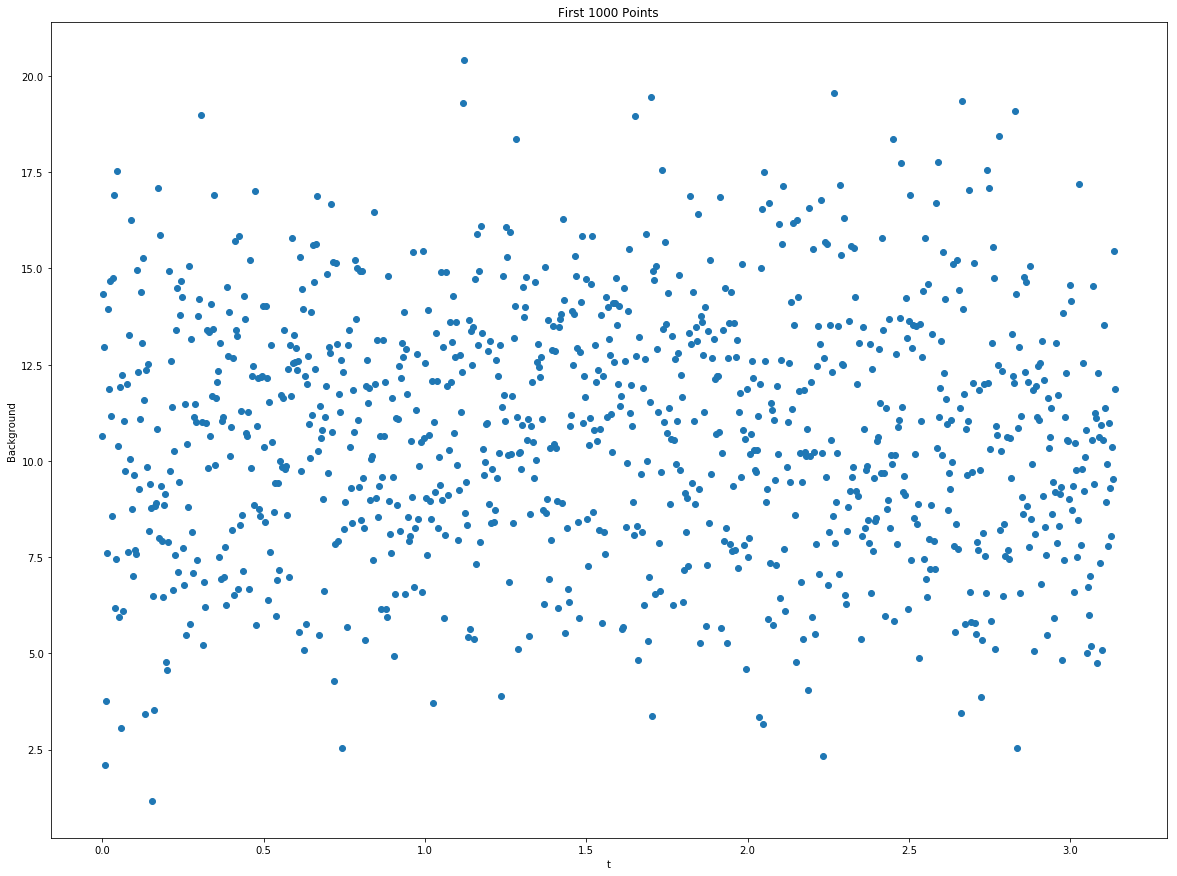

In [73]:
# So let's start by making some fake background data. First, let's make a time axis that goes from 0 to 100 π  in 1e5 steps

t = np.linspace(0,np.pi*100,np.int(1e5))

#Then an offset sinusoid

N = 10+np.sin(t)

# Then some random background data whose mean and variance depend on N
bkgd = stats.norm.rvs(size=np.int(1e5))*np.sqrt(N)+N

# 1a) Make a scatter plot (not a line plot) of the first 1000 data points.
plt.scatter(t[0:1000], bkgd[0:1000],)
plt.xlabel("t")
plt.ylabel("Background")
plt.title("First 1000 Points")
plt.show()

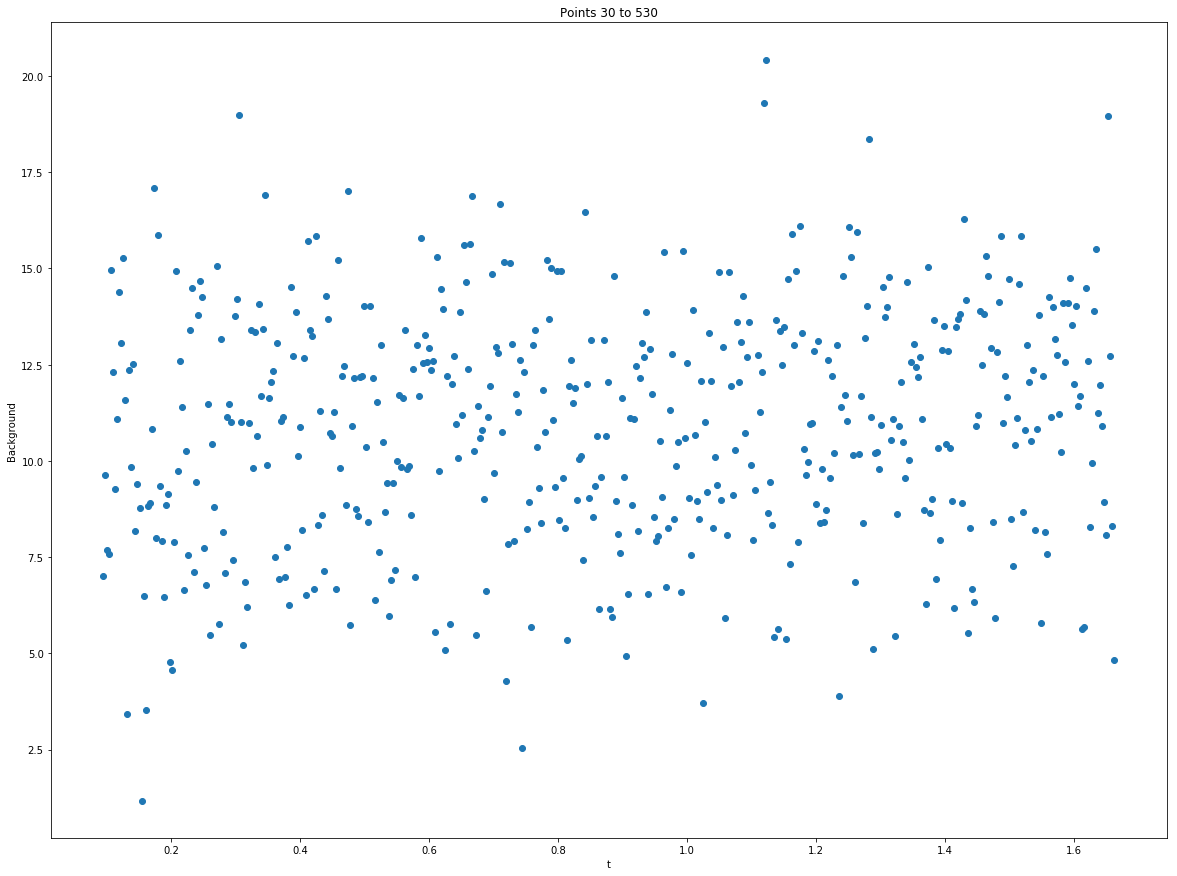

In [74]:
# 1b) Generalize your code so you can make a plot of any X contiguous points (e.g. 2000 points starting at point 500), and 
# produce an example plot of a set of data somethere in the middle of your array.
def plot_size(index, size):
    plt.scatter(t[index : index+size],bkgd[index : index+size])
    

plot_size(30,500)
plt.xlabel("t")
plt.ylabel("Background")
plt.title("Points 30 to 530")
plt.show()

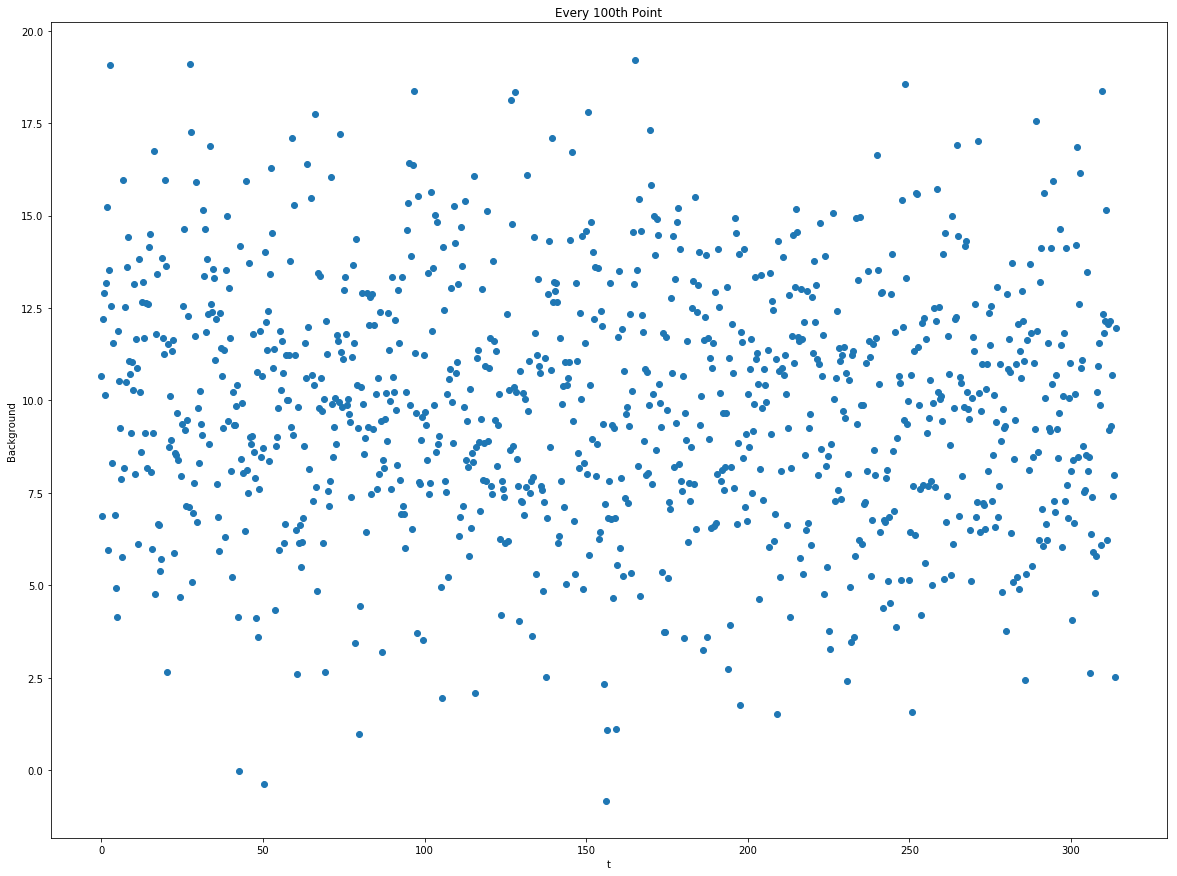

In [75]:
# 1c) Sometimes you want to sample the data, such as plotting every 100th point. Make a plot of the full data range, but 
# only every 100th point.
plt.scatter(t[::100],bkgd[::100])
plt.xlabel("t")
plt.ylabel("Background")
plt.title("Every 100th Point")
plt.show()

# Problem 2

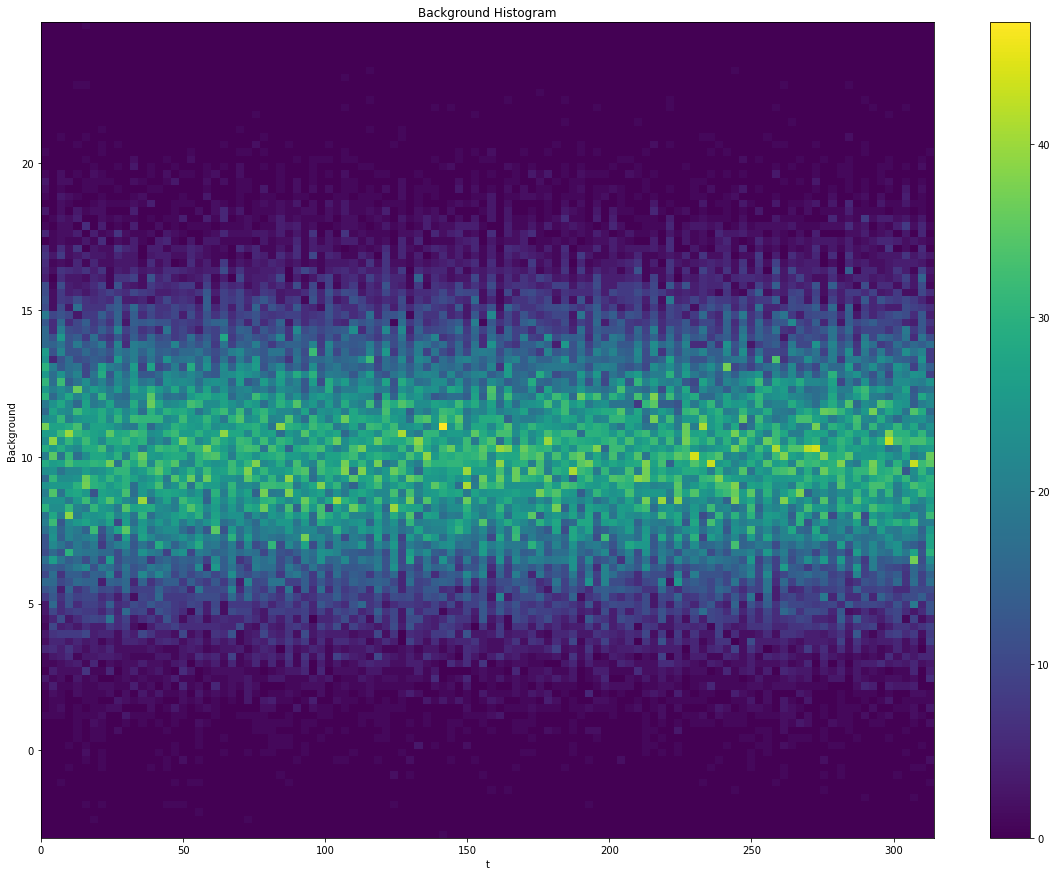

In [76]:
# 2a) Make a 2d histogram plot. Read about options, and play with binsize so it is useful (too large a bin and everything 
# washes out, too small and the sample noise dominates). Make sure you use a colorbar.
plt.hist2d(t,bkgd,bins=110)
plt.xlabel("t")
plt.ylabel("Background")
plt.title("Background Histogram")
plt.colorbar()
plt.show()

#### 2b) Clearly explain what is being plotted in your plot (e.g. what does each color mean?)
The colors correspond to the frequency of values, and their position correlates to a specific time. In the above plot, most of our values are demonstrated to be between 5 and 15, most centered at around 10, while the darker colors show that there is little data of points being below zero or above 20 at all times t.

# Problem 3

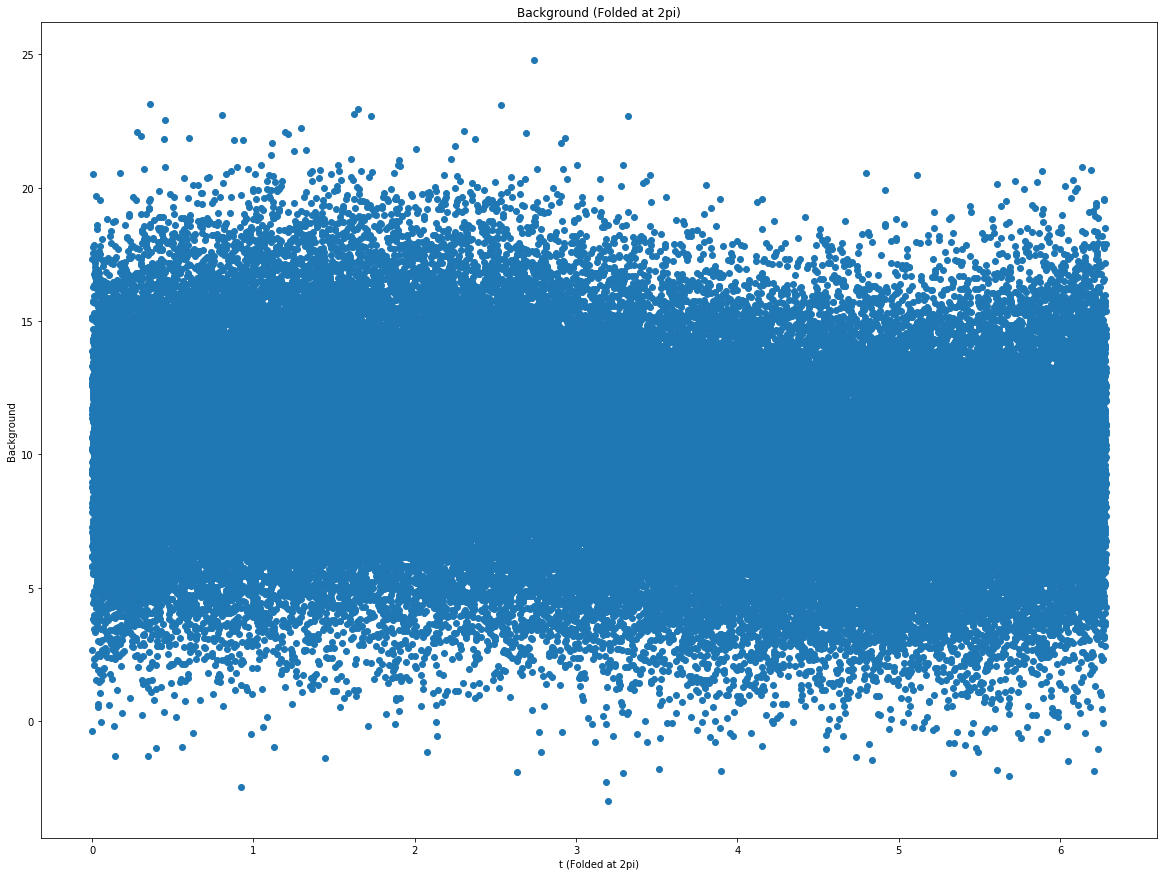

In [77]:
# 3a) Make an new time variable that folds at a period of 2π (the modulo operator is your friend, variably expressed as 
# mod(), %, or rem()). Then make a scatter plot of all your data, but now folded. (Reminder, for more data you'd never 
# actually want to plot all the points.)

plt.scatter(t%(2*np.pi),bkgd)
plt.xlabel("t (Folded at 2pi)")
plt.ylabel("Background")
plt.title("Background (Folded at 2pi)")
plt.show()

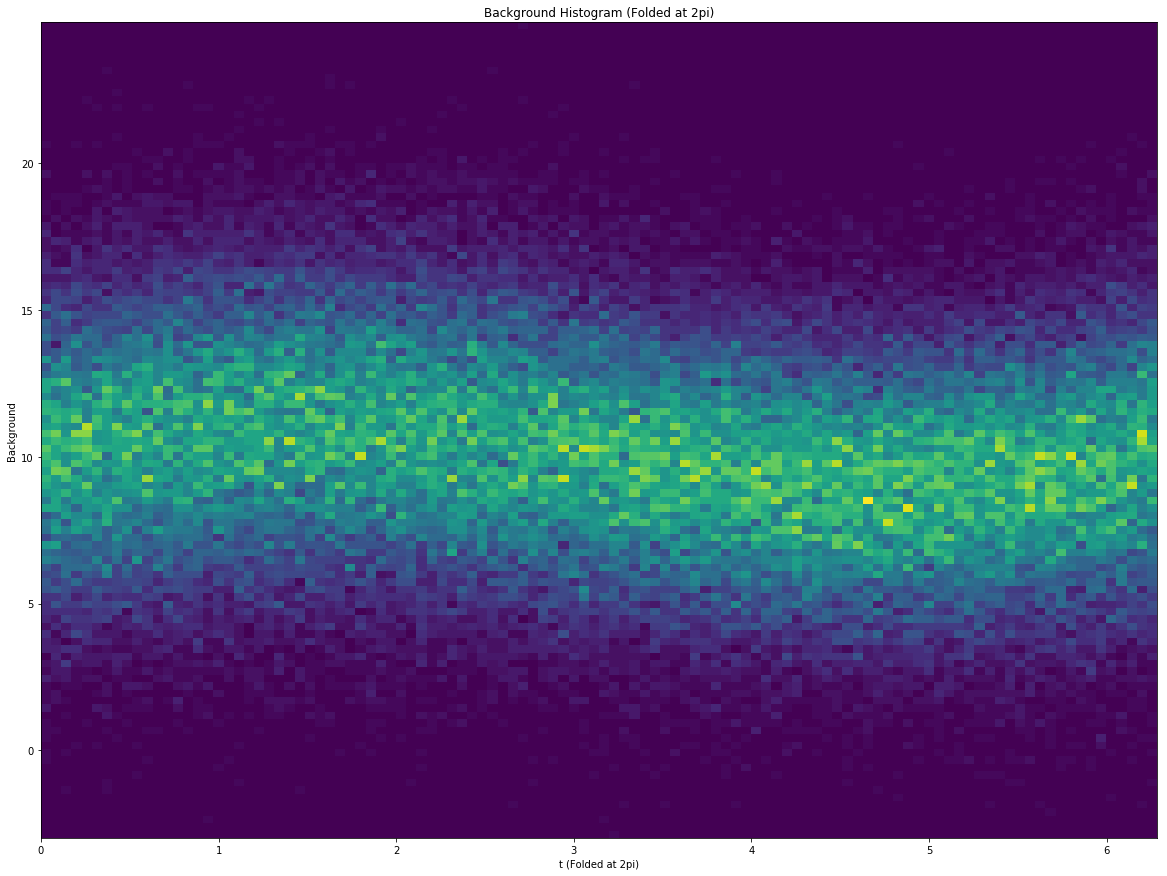

In [78]:
# 3b) Make a 2D histogram plot of your folded data.
plt.hist2d(t%(2*np.pi),bkgd,bins=110)
plt.xlabel("t (Folded at 2pi)")
plt.ylabel("Background")
plt.title("Background Histogram (Folded at 2pi)")
plt.show()

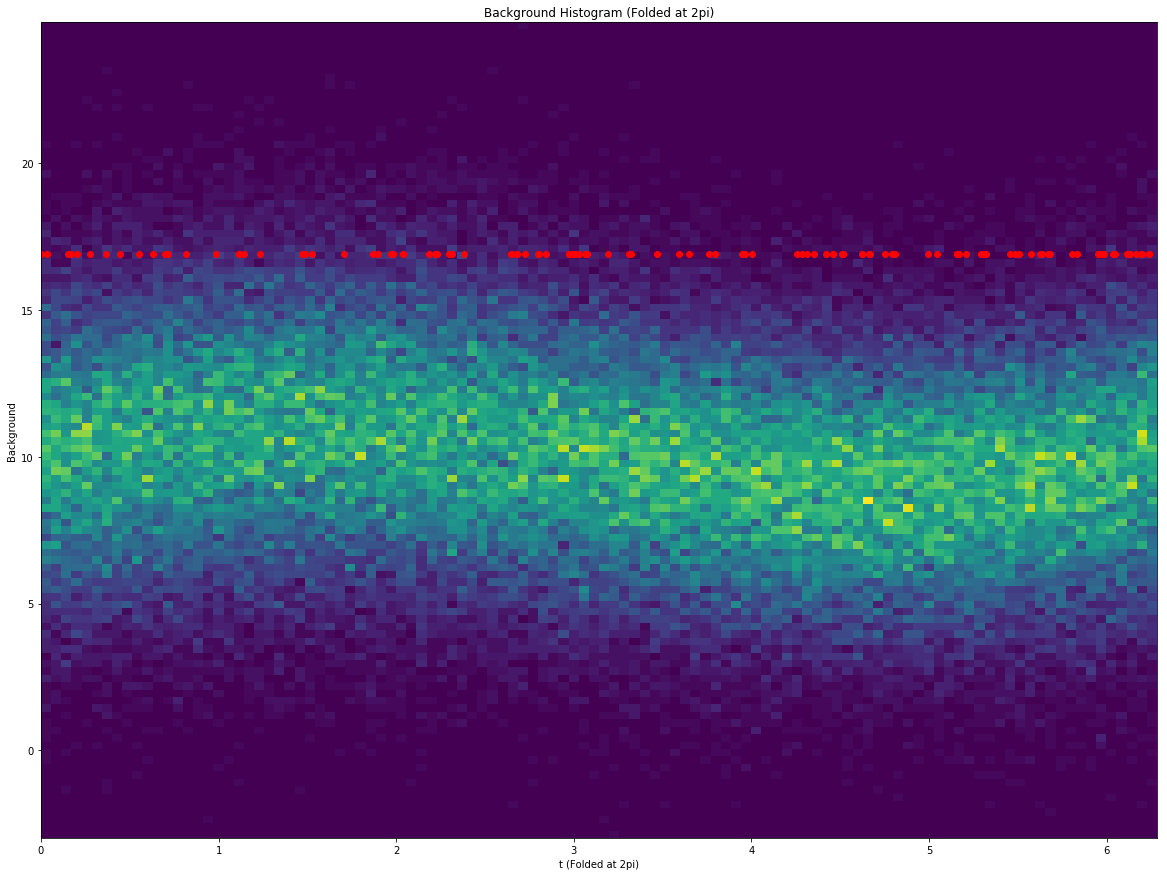

In [136]:
# 3c) You can use 2D histograms or digitize functions, plus some math, to calculate the average as a function of the folded 
# variable. You can then overplot this on 3b to show the average as a function of folded time.
bins = np.linspace(0, 1, 110)

dig = np.digitize(bkgd, bins)

#Find mean values
means = []
for i in range(len(bins)):
    means.append(np.mean(bkgd[dig[i]]))

#remove duplicates
x= list(set(t%(2*np.pi)))


plt.hist2d(t%(2*np.pi),bkgd,bins=110)
#plot averages, using first 110 values of filtered list
plt.scatter(x[0:110], means,color="red")
plt.xlabel("t (Folded at 2pi)")
plt.ylabel("Background")
plt.title("Background Histogram (Folded at 2pi)")
plt.show()